# Riley Holmes Notebook - Intro to Jupyter and Exploratory Data Analysis (EDA)

REQ: Open notebooks with a standard header including a good title, your company/name/alias, a link to the repo, purpose, and date.

REQ: For EDA projects, include dataset, description, and source information.

- Author: [Riley Holmes](https://github.com/rdholmes31)
- Repository: [datafun-04-notebooks](https://github.com/rdholmes31/datafun-04-notebooks)
- Purpose: Demonstrate a repeatable EDA workflow for a new, unexplored dataset
- Date: 2026-01

## Dataset Information

- Dataset: Car Fuel Efficiency
- Description: A dataset for cars and their associated price & features; manufactured between 1970-82 in USA, Europe., and Japan.
- Source: [Seaborn mpg](https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv)
- Original Collection: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
- Citation: Seaborn
- Access: Available via Seaborn's built-in datasets

This is a Markdown cell.

## Section 1. Project Setup and Imports

All imports and configuration appear once, at the top of the notebook.

WHY:
- Keeps notebooks readable and reproducible
- Mirrors professional scripts
- Makes it clear what must be installed

This is a Markdown cell.

In [21]:
# This is a Python cell.

# Imports at the top of the file
# REQ.EXTERNAL.DEPS: External packages must be defined in pyproject.toml
# REQ.EXTERNAL.DEPS.INSTALLED: external packages must be installed in the environment using uv sync command
# REQ.EXTERNAL.DEPS.IMPORTED: external packages used in this notebook must be imported here


from matplotlib.axes import Axes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Type hint for Axes object (basic plot type returned by Seaborn)
# A seaborn plot is a set of axes and you can set the title, labels, etc. on the axes.

# A figure can contain multiple axes (plots)
# from matplotlib.figure import Figure

# Pandas display configuration (helps in notebooks)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

print("Imports complete.")

Imports complete.


## Section 2. Load the Data

This is a Markdown cell.

WHY: Before analysis, load the data to confirm:

- The dataset loads successfully
- The structure matches expectations
- Column names are available and readable

This is a Markdown cell.

In [22]:
# Python cell

# Load the mpg dataset from Seaborn
# Into a pandas DataFrame (2D table)
mpg_df: pd.DataFrame = sns.load_dataset("mpg")

# Preview the first few rows
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Section 3. Inspect Data Shape and Structure

WHY: First, understand the shape (basic structure) of the data:

- How many rows and columns are there?
- What types of data are present?
- Are there obvious missing values?

This step determines challenges we might have downstream (later).

This is a Markdown cell.

In [23]:
# Section 3 Python cell

# Get shape - number of rows and columns
shape: tuple[int, int] = mpg_df.shape

# Communicate the shape clearly
print(f"The mpg dataset has {shape[0]} rows and {shape[1]} columns.")

The mpg dataset has 398 rows and 9 columns.


In [24]:
# Section 3 Python cell

# Display column names and data types
mpg_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    str    
 8   name          398 non-null    str    
dtypes: float64(4), int64(3), str(2)
memory usage: 28.1 KB


In [25]:
# Section 3 Python cell

# List the column names
print("Column names:")
print(list(mpg_df.columns))

Column names:
['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'name']


## Section 4. Create Data Dictionary and Check Data Quality

WHY: Missing data is normal. We need to find out how much and where.

Missing data affects:

- Visualizations
- Summary statistics
- Machine learning models

LOOK FOR: 

- Columns with many missing values
- Patterns (entire rows missing multiple fields)

This is a Markdown cell.


In [26]:
# Section 4 Python cell

# Count missing values in each column
print("Missing values per column:")
print(mpg_df.isnull().sum())

Missing values per column:
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [27]:
# Section 4 Python cell

# Check for duplicate rows
num_duplicates = mpg_df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


## Section 5. Create Clean View for EDA

WHY: We often want to work with complete data for visualizations and statistics.

Strategy:
- Keep the original DataFrame unchanged
- Create a separate clean view by dropping rows with missing values

This is a Markdown cell.

In [28]:
# Section 5 Python cell

# Create a clean view by dropping rows with any missing values
mpg_clean: pd.DataFrame = mpg_df.dropna()

# Compare sizes
print(f"Original dataset: {len(mpg_df)} rows")
print(f"Clean dataset: {len(mpg_clean)} rows")
print(f"Rows removed: {len(mpg_df) - len(mpg_clean)}")

Original dataset: 398 rows
Clean dataset: 392 rows
Rows removed: 6


## Section 6. Descriptive Statistics for Numeric Columns

WHY: Summary statistics give us a quick overview of the numeric data:

- Central tendency (mean)
- Spread (std, min, max)
- Distribution shape (quartiles)

This is a Markdown cell.

In [29]:
# Section 6 Python cell

# Summary statistics for numeric columns
mpg_clean.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [30]:
# Section 6 Python cell

# AND/OR Calculate statistics for a specific column with numpy
mean_mpg = np.mean(mpg_clean["mpg"])
std_mpg = np.std(mpg_clean["mpg"])
min_mpg = np.min(mpg_clean["mpg"])
max_mpg = np.max(mpg_clean["mpg"])
range_mpg = np.ptp(mpg_clean["mpg"])  # peak to peak (max - min)

print("Body Mass Statistics (using numpy):")
print(f"  Mean: {mean_mpg:.2f} ")
print(f"  Std Dev: {std_mpg:.2f} ")
print(f"  Min: {min_mpg:.2f} ")
print(f"  Max: {max_mpg:.2f} ")
print(f"  Range: {range_mpg:.2f} ")

Body Mass Statistics (using numpy):
  Mean: 23.45 
  Std Dev: 7.80 
  Min: 9.00 
  Max: 46.60 
  Range: 37.60 


## Section 7. Correlation Matrix for Numeric Columns

WHY: Correlation tells us how numeric variables relate to each other.

- Values near 1 or -1 indicate strong relationships
- Values near 0 indicate weak or no linear relationship

This is a Markdown cell.

In [31]:
# Section 7 Python cell

# Select only numeric columns and compute correlation
numeric_cols = mpg_clean.select_dtypes(include="number")
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

                   mpg  cylinders  displacement  horsepower    weight  acceleration  model_year
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244      0.423329    0.580541
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527     -0.504683   -0.345647
displacement -0.805127   0.950823      1.000000    0.897257  0.932994     -0.543800   -0.369855
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538     -0.689196   -0.416361
weight       -0.832244   0.897527      0.932994    0.864538  1.000000     -0.416839   -0.309120
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839      1.000000    0.290316
model_year    0.580541  -0.345647     -0.369855   -0.416361 -0.309120      0.290316    1.000000


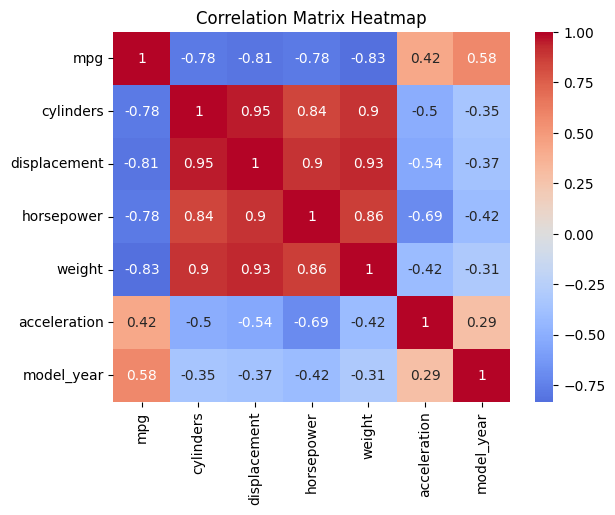

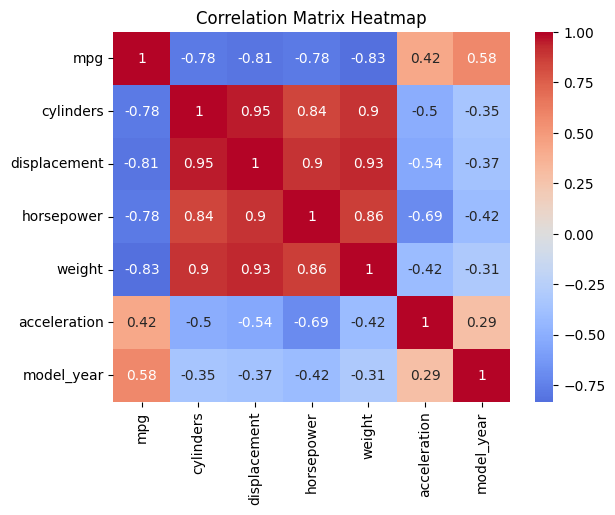

In [32]:
# Section 7 Python cell

# Visualize the correlation matrix as a heatmap
# Set annotations to True to show correlation values
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


# Visualize the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix Heatmap")
plt.show()


Use Markdown cells to narrate and tell the story as you explore.

Interpretation:

 - Values close to 1 (dark red) = strong positive correlation (both increase together)
 - Values close to -1 (dark blue) = strong negative correlation (one increases, other decreases)
 - Values close to 0 (white) = little or no linear relationship
 - The diagonal is always 1 (each variable correlates perfectly with itself)

From this heatmap, we can see that **mpg** and **weight** show strong positive correlation (~0.83).

This is a Markdown cell.

## Section 8. Make Plots

WHY: Visualizations reveal patterns not obvious in tables.

Create:
1. A scatter plot to see relationships between two variables
2. A box plot to compare distributions across groups

This is a Markdown cell.

Text(0.5, 1.0, 'Chart 1. MPG vs. Weight (by Model Year)')

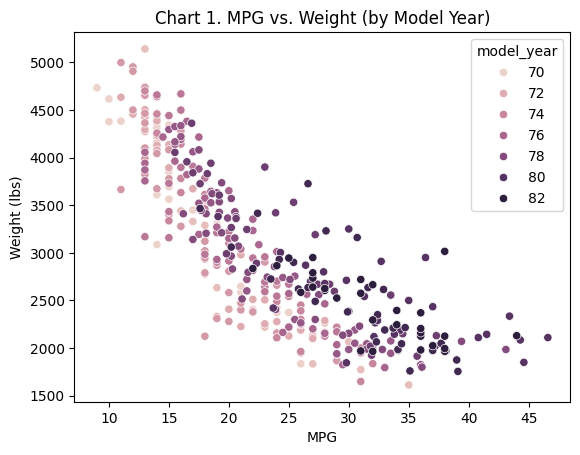

In [33]:
# Section 8 Python cell - use "Run All" so prior cells are executed first.

# Create a scatter plot of mpg vs. weight
# We need to know our dataset column names so we can use them to set x, y, and hue (color)
scatter_plt: Axes = sns.scatterplot(
    data=mpg_clean, x="mpg", y="weight", hue="model_year"
)

# Set axis labels using the Matplotlib Axes methods set_xlabel() and set_ylabel()
scatter_plt.set_xlabel("MPG")
scatter_plt.set_ylabel("Weight (lbs)")

# Set the title using the Matplotlib Axes set_title() method
scatter_plt.set_title("Chart 1. MPG vs. Weight (by Model Year)")

# Run by clicking Run All in the Menu up top

## Section 9. Reminder: Run All before sending to GitHub

Before saving a notebook (and running git add-commit-push), click 'Run All' to generate all outputs and display them in the notebook. 

This is a Markdown cell.
